In [9]:
import glob, os
os.chdir('c:\\python\\Computer Vision\\yolo\\people with mask vest boots and hardhat\\')


In [127]:
jpg_list = []
image_list =[]
for file in glob.glob("*.jpg"):
    jpg_list.append(file)
    im = Image.open(file)
    size=im.size
    image_list.append((file,size[0],size[1]))
#     size_list.append(im.size)
#     width, height = im.size

In [128]:
import pandas as pd
df = pd.DataFrame(image_list)
cols =['FileName','IMG_H','IMG_W']

df.columns = cols

In [129]:
df.head()

,FileName,IMG_H,IMG_W
0,image no (10).jpg,1024,682
1,image no (100).jpg,640,920
2,image no (101).jpg,905,854
3,image no (104).jpg,612,407
4,image no (105).jpg,2592,1944


In [130]:
main_df = pd.read_csv('images_final_2.csv')

In [131]:
main_df.head()

,FileName,CX,CY,W,H,Class
0,image no (2).jpeg,46,89,42,27,mask
1,image no (2).jpeg,218,31,40,36,mask
2,image no (2).jpeg,6,195,53,34,mask
3,image no (2).jpeg,194,196,56,30,mask
4,image no (2).jpeg,166,274,37,49,mask


In [203]:
df1 = pd.merge(main_df,df,on='FileName',how='left',indicator=True)
df1 = df1.loc[df1._merge=='both'].drop(columns='_merge')
df1 = df1.astype({'IMG_H': 'int64',
           'IMG_W':'int64'})
df1.reset_index(drop=True, inplace=True)
# df1 = df1[['FileName', 'IMG_H', 'IMG_W', 'Class','CX', 'CY', 'W', 'H']]

In [204]:
main_df.shape, df1.shape

((850, 6), (694, 8))

In [238]:
df1.Class.value_counts()

hardhat    289
vest       149
mask       143
boots      113
Name: Class, dtype: int64

In [205]:
df1.head()

,FileName,CX,CY,W,H,Class,IMG_H,IMG_W
0,image no (9).jpg,499,54,255,195,hardhat,1500,1125
1,image no (9).jpg,383,362,459,739,vest,1500,1125
2,image no (10).jpg,239,107,219,173,hardhat,1024,682
3,image no (10).jpg,86,349,389,332,vest,1024,682
4,image no (11).jpg,158,7,74,49,hardhat,635,300


In [206]:
df1['W/H'] = df1.W/df1.H

In [207]:
df1.head()

,FileName,CX,CY,W,H,Class,IMG_H,IMG_W,W/H
0,image no (9).jpg,499,54,255,195,hardhat,1500,1125,1.307692
1,image no (9).jpg,383,362,459,739,vest,1500,1125,0.621110
2,image no (10).jpg,239,107,219,173,hardhat,1024,682,1.265896
3,image no (10).jpg,86,349,389,332,vest,1024,682,1.171687
4,image no (11).jpg,158,7,74,49,hardhat,635,300,1.510204


In [208]:
import matplotlib.pyplot as plt
y = df1['W/H'].sort_values()
x = list(range(len(y)))

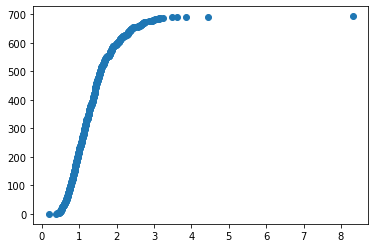

In [209]:
plt.scatter(y,x)

In [210]:
df1[['hdf','wdf']] = df1[['IMG_H','IMG_W']]
df1['h1'] = df1.IMG_H/df1.hdf
df1['w1'] = df1.IMG_W/df1.wdf

df1['cx'] = df1.CX/df1.wdf
df1['cy'] = df1.CY/df1.hdf
df1['w'] = df1.W/df1.wdf
df1['h'] = df1.H/df1.hdf

df1['log_w'] = np.log(df1.w)
df1['log_h'] = np.log(df1.h)

In [211]:
df1.head()

,FileName,CX,CY,W,H,Class,IMG_H,IMG_W,W/H,hdf,wdf,h1,w1,cx,cy,w,h,log_w,log_h
0,image no (9).jpg,499,54,255,195,hardhat,1500,1125,1.307692,1500,1125,1.0,1.0,0.443556,0.036000,0.226667,0.130000,-1.484275,-2.040221
1,image no (9).jpg,383,362,459,739,vest,1500,1125,0.621110,1500,1125,1.0,1.0,0.340444,0.241333,0.408000,0.492667,-0.896488,-0.707922
2,image no (10).jpg,239,107,219,173,hardhat,1024,682,1.265896,1024,682,1.0,1.0,0.350440,0.104492,0.321114,0.168945,-1.135958,-1.778180
3,image no (10).jpg,86,349,389,332,vest,1024,682,1.171687,1024,682,1.0,1.0,0.126100,0.340820,0.570381,0.324219,-0.561450,-1.126337
4,image no (11).jpg,158,7,74,49,hardhat,635,300,1.510204,635,300,1.0,1.0,0.526667,0.011024,0.246667,0.077165,-1.399717,-2.561805


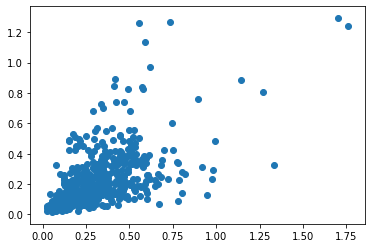

In [212]:
import numpy as np
plt.scatter(df1.w,df1.h)


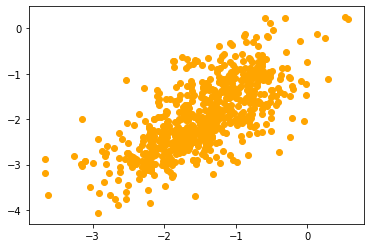

In [213]:
plt.scatter(df1.log_w,df1.log_h,color='orange')

In [214]:
#k means
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [222]:
X1 = df1[['log_w','log_h']]

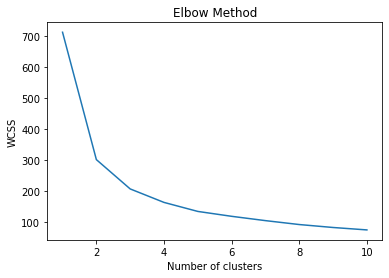

In [224]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

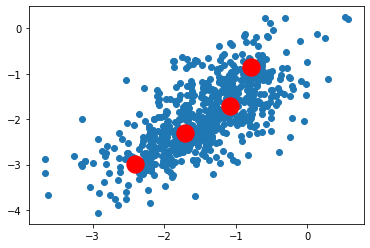

In [237]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X1)
plt.scatter(X1.iloc[:,0], X1.iloc[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()